# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list for data 
data = [] 

# Query the table 
rows = soup.find_all('tr') 

# Extract information for the header 
header_row = rows[0]
header_data = [cell.text for cell in header_row.find_all('th')]

# For loop to include all data into a dictionary of lists 
for row in rows: 
    row_data = []
    
    for cell in row.find_all('td'): 
        row_data.append(cell.text)
    data.append(row_data) 

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=header_data)

# Drop the first row from the DataFrame
df = df.drop(0)

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data anaysis 
df = df.astype({
    'terrestrial_date' : 'datetime64[ns]',
    'sol' :'int64', 
    'ls' : 'int64',
    'month':'int64', 
    'min_temp' : 'float64',
    'pressure' : 'float64'})

In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
mars_months = df.groupby('month')['month'].size()
mars_months 

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [116]:
# 2. How many Martian days' worth of data are there?
data_days = len(df)
print(f"There are {data_days} Martian days' worth of data in the dataframe provided'")

There are 1867 Martian days' worth of data in the dataframe provided'


In [117]:
# 3. What is the average low temperature by month?
min_temp = df.groupby('month')['min_temp'].mean()
min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

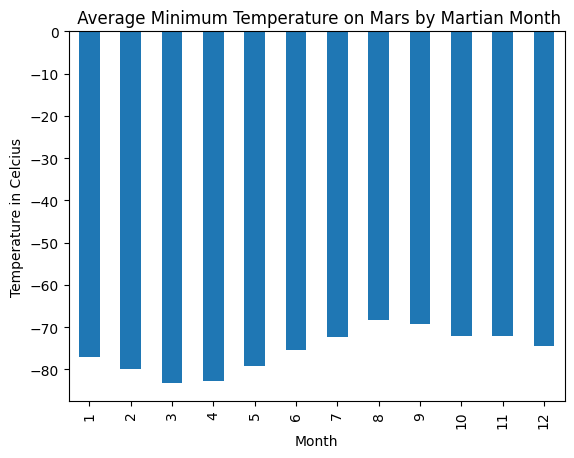

In [16]:
# Plot the average temperature by month
min_temp_chart = min_temp.plot(
    kind= 'bar', 
    ylabel ='Temperature in Celcius', 
    xlabel= 'Month', 
    title=' Average Minimum Temperature on Mars by Martian Month'
)
plt.show()

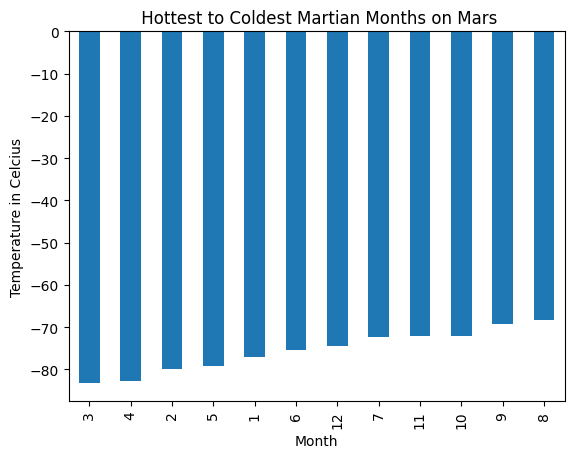

In [17]:
# Identify the coldest and hottest months in Curiosity's location
min_sorted_temp = min_temp.sort_values().plot(
    kind='bar', 
    ylabel ='Temperature in Celcius', 
    xlabel= 'Month', 
    title=' Hottest to Coldest Martian Months on Mars'
)
min_sorted_temp
plt.show()

In [18]:
# 4. Average pressure by Martian month
month_pressure = df.groupby('month')['pressure'].mean()
month_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

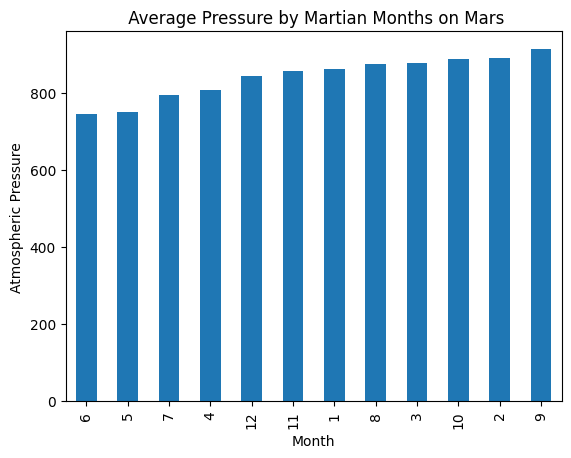

In [19]:
# Plot the average pressure by month
pressure_sorted = month_pressure.sort_values().plot(
    kind='bar', 
    ylabel ='Atmospheric Pressure', 
    xlabel= 'Month', 
    title=' Average Pressure by Martian Months on Mars'
)
plt.show()

In [20]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [102]:
ls = df.loc[df['ls']==155]
ls

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
599,621,2014-07-03,678,155,6,-77.0,739.0
600,624,2014-07-04,679,155,6,-77.0,738.0
1250,1274,2016-05-20,1346,155,6,-75.0,737.0
1251,1277,2016-05-21,1347,155,6,-75.0,736.0


In [88]:
year_counts = {}  # Initialize an empty dictionary to store counts per year

for year in range(2012, 2019):  # Loop through the years 2013 to 2017
    year_counts[year] = 0  # Initialize the count for the current year to 0
    
for year in range(2012, 2019):  # Loop through the years 2013 to 2017
    for month in range(1, 13):  # Loop through the months 1 to 12
        filtered_df = df[(df['terrestrial_date'].dt.year == year) & (df['terrestrial_date'].dt.month == month)]  # Filter by year and month
        count = len(filtered_df)  # Count the number of rows for the current year and month
        year_counts[year] += count  # Add the count to the previous count for the current year

# Calculate the total count
total_count = sum(year_counts.values())

# Print or use the dictionary and total as needed
print(year_counts)

# Remove years that have insignificant numbers e.g. 2012 and 2018 
year_counts.pop(2012)
year_counts.pop(2018)
print(year_counts)

# Verify all data accounted for 
print("Total:", total_count)

{2012: 42, 2013: 42, 2014: 42, 2015: 42, 2016: 42, 2017: 42, 2018: 42}
{2013: 42, 2014: 42, 2015: 42, 2016: 42, 2017: 42}
Total: 294


In [86]:
mars_days_year = sum(year_counts.values())/len(year_counts)
mars_days_year

1867.0

In [111]:
# 5. How many terrestrial (earth) days are there in a Martian year?
month_counts = {} 

# For loop for 12 instances 
for i in range(1,13): 
    months_dict = {} 
    filtered_df = df[df['month'] == i ]
    days = filtered_df.groupby(df.terrestrial_date.dt.year)['month'].value_counts() 
    print(days)
# df.groupby(df.your_date_column.dt.year) 

# Calculate the length of the Martian year in Earth days


terrestrial_date  month
2013              1        53
2015              1        61
2017              1        60
Name: count, dtype: int64
terrestrial_date  month
2013              2        48
2015              2        65
2017              2        65
Name: count, dtype: int64
terrestrial_date  month
2013              3        15
2014              3        44
2015              3        64
2016              3         3
2017              3        66
Name: count, dtype: int64
terrestrial_date  month
2014              4        65
2016              4        64
2017              4        41
2018              4        24
Name: count, dtype: int64
terrestrial_date  month
2014              5        59
2016              5        58
2018              5        32
Name: count, dtype: int64
terrestrial_date  month
2012              6        40
2014              6        55
2016              6        52
Name: count, dtype: int64
terrestrial_date  month
2012              7        50
2014            

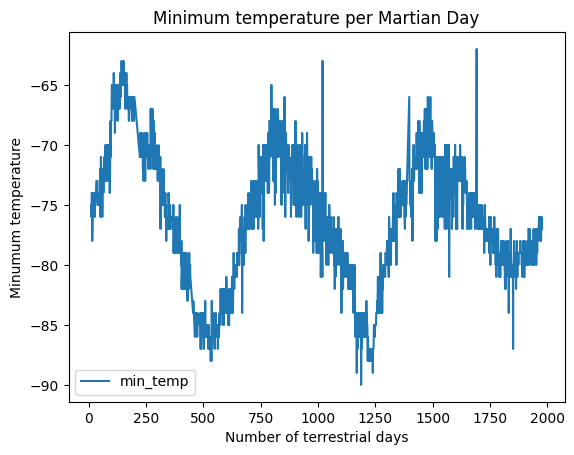

In [115]:
df.plot(
    kind='line', 
    x='sol', 
    xlabel ='Number of terrestrial days',
    y ='min_temp', 
    ylabel = 'Minumum temperature',
    title = 'Minimum temperature per Martian Day',
    layout='tight')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV


In [21]:
browser.quit()